In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
# df = pd.read_csv('advertising.csv')

In [3]:
# df.head()

In [4]:
# plt.scatter(x=df['TV'], y=df['Sales'])

In [5]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], test_size=0.2, random_state=42)

In [6]:
# X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [7]:
# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()

In [8]:
# lr.fit(X_train,y_train)

In [9]:
# y_pred = lr.predict(X_test)

In [10]:
# lr.coef_

In [11]:
# lr.intercept_

In [12]:
# from sklearn.metrics import r2_score 

# r2_score(y_test,y_pred)

# Gradient descent algorithm

In [13]:
from sklearn.datasets import make_regression
import numpy as np

In [63]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

In [66]:
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

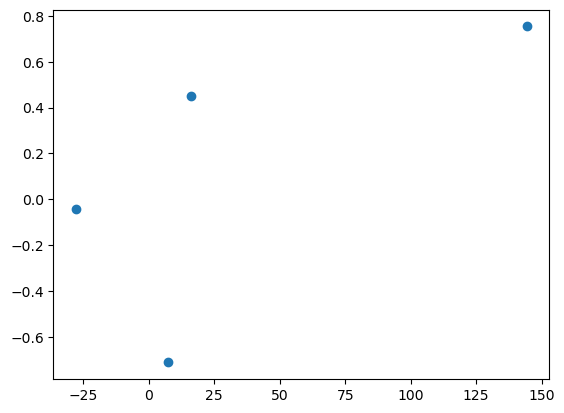

In [54]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [55]:
# lets apply OLS
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [56]:
lr.fit(X.reshape(-1,1),y)

LinearRegression()

In [57]:
lr.coef_

array([[0.005662]])

In [58]:
lr.intercept_

array([-0.0857063])

In [59]:
type(lr)

sklearn.linear_model._base.LinearRegression

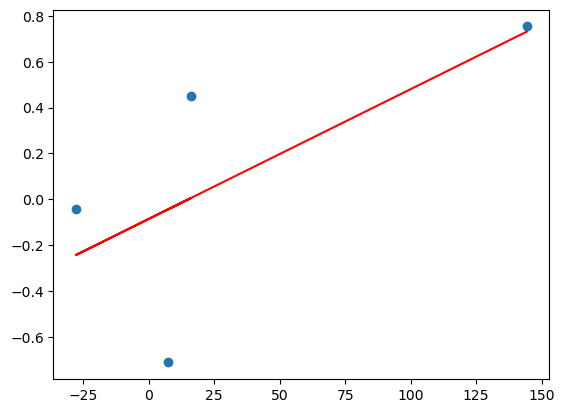

In [60]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X.reshape(-1,1)), color='red')

In [61]:
# lets apply gradient descent assuming slop is constant m= 78.35
# and lets assume the starting value for intercept b = 0
y_pred = ((78.35 * X) + 0).reshape(4)

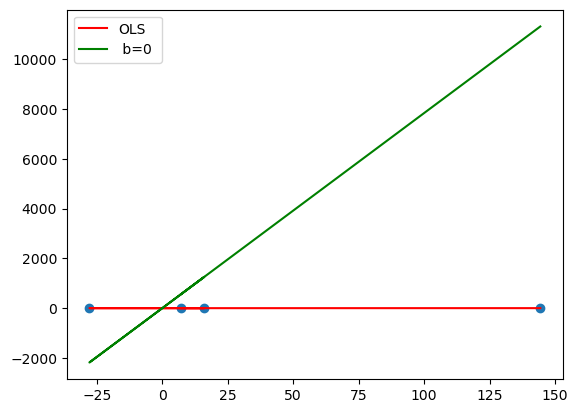

In [62]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X.reshape()), color='red', label='OLS')
plt.plot(X,y_pred, color='green', label=" b=0 ")
plt.legend()
plt.show()

In [49]:
m = 78.35
b = 0

loss_slop = -2 * np.sum(y - m*X.ravel() - b)
loss_slop

87618.84155211416

In [26]:
# lets take learning rate = 0.1 
lr = 0.1

step_size = loss_slop*lr
step_size

-20.927763408209216

In [27]:
# calculating the new intercept
b = b - step_size
b

20.927763408209216

AttributeError: 'float' object has no attribute 'predict'

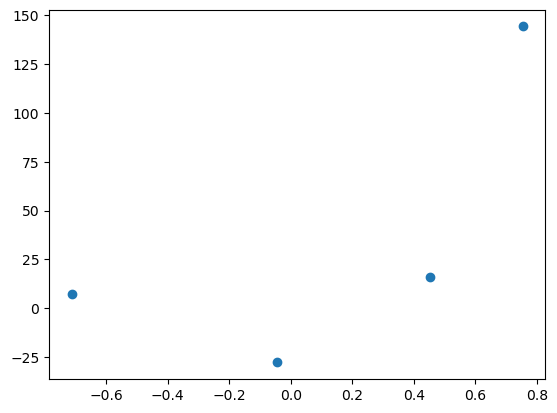

In [30]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X, y)
plt.plot(X, lr.predict(X.reshape(-1,1)), color='red', label='OLS')
plt.plot(X, y_pred1, color='green', label='b = {}'.format(b))
plt.plot(X, y_pred, color='black', label='b = 0')
plt.legend()
plt.show()

# other gradient descent

In [68]:
from sklearn.datasets import make_regression
import numpy as np

In [137]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=40, random_state=13)

In [138]:
y

array([-48.97186009,  -6.7735671 , -25.64903977,  14.56838287,
        48.94507923, -29.59159022, -21.67973942,   5.69447297,
       -32.94727907, -57.9448432 ,  19.03557037,  14.73940208,
        44.32096958, -31.50486194, -25.71067844,  63.05692209,
        -4.2726983 , -21.07010557, -53.84135669, -16.39872721,
       -64.15081236,  26.31479957, -25.00918852,  66.27490484,
        30.69865434, -20.1747094 , -28.30241804, -49.88929597,
       -44.08749561,  23.22216041,  72.7762451 ,  27.63839529,
        63.44985897, -34.32273739, -63.3647061 , -60.15691115,
       -19.77964083,  42.66981669, -40.45941483,   1.21392304,
       -37.59578776,  16.61232311,  -1.13561968, -18.50078656,
        82.76936724,  23.84075876,  13.72569578, -87.42560787,
        46.61060113,   0.25490767,   7.19209715, -32.27463072,
       -77.47834844,  56.17206307,  16.2290068 ,  38.3914105 ,
        -7.47072407,  12.39958415,  12.44049838,  26.8261985 ,
        15.31164872, -36.28229008,  17.35406339, -85.41

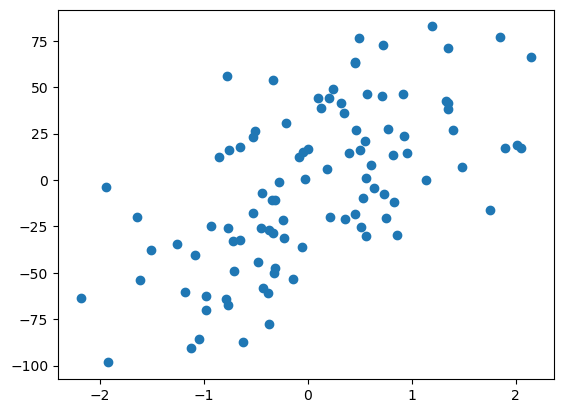

In [141]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [142]:
# lets apply OLS
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [143]:
lr.fit(X,y)

LinearRegression()

In [144]:
lr.coef_

array([28.04787357])

In [145]:
lr.intercept_

-4.589489117353961

In [146]:
y_pred = lr.predict(X)

In [147]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.37602549205963187

In [110]:
import matplotlib.pyplot as plt
plt.scatter(X)

TypeError: scatter() missing 1 required positional argument: 'y'

In [ ]:
m = 28.48

In [100]:
class GDRegressor:

    def __init__(self,learning_rate,epochs):
        self.m = 28.48
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        # calculate the b using GD
        for i in range(self.epochs): 
            loss_slop = -2 * np.sum(y - self.m*X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slop)
            print(f'iter={i}',loss_slop,self.b)
        print(self.b)
        

In [103]:
gd = GDRegressor(0.1,100)

In [104]:
gd.fit(X,y)

iter=0 -22164.291247332054 2096.4291247332053
iter=1 421121.53369930905 -40015.7242451977
iter=2 -8001309.140286872 760115.1897834896
iter=3 152024873.66545057 -14442372.17676157
iter=4 -2888472599.643562 274404887.7875946
iter=5 54880979393.22768 -5213693051.535173
iter=6 -1042738608471.3258 99060167795.59741
iter=7 19812033560955.19 -1882143188299.9219
iter=8 -376428637658148.7 35760720577514.945
iter=9 7152144115504824.0 -679453690972967.5
iter=10 -1.3589073819459166e+17 1.29096201284862e+16
iter=11 2.5819240256972426e+18 -2.4528278244123808e+17
iter=12 -4.905655648824761e+19 4.660372866383523e+18
iter=13 9.320745732767045e+20 -8.854708446128693e+19
iter=14 -1.770941689225738e+22 1.6823946047644513e+21
iter=15 3.3647892095289023e+23 -3.1965497490524575e+22
iter=16 -6.393099498104914e+24 6.073444523199668e+23
iter=17 1.214688904639933e+26 -1.1539544594079364e+25
iter=18 -2.3079089188158734e+27 2.1925134728750797e+26
iter=19 4.385026945750159e+28 -4.165775598462651e+27
iter=20 -8.3315